In [3]:
# Python
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Src.data_loader import load_data, split_features_target
from Src.model import RealEstateModel
from Src.utils import correlation_heatmap, residual_plot


In [7]:
data_path = "../Data/dataset.csv"


In [11]:
df = load_data(data_path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   square_feet          1000 non-null   int64  
 1   num_bedrooms         1000 non-null   int64  
 2   num_bathrooms        1000 non-null   int64  
 3   dist_to_city_center  1000 non-null   float64
 4   age_of_house         1000 non-null   int64  
 5   price                1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [12]:
df.describe()


,square_feet,num_bedrooms,num_bathrooms,dist_to_city_center,age_of_house,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2018.77300,2.978000,1.972000,15.465650,25.332000,7.564334e+05
std,865.75822,1.430231,0.803655,8.394682,14.595849,2.783877e+05
min,501.00000,1.000000,1.000000,1.000000,0.000000,1.599510e+05
25%,1274.50000,2.000000,1.000000,8.737500,13.000000,5.247948e+05
50%,2009.50000,3.000000,2.000000,15.450000,25.000000,7.631935e+05
75%,2737.50000,4.000000,3.000000,22.542500,38.000000,9.833658e+05
max,3499.00000,5.000000,3.000000,29.940000,50.000000,1.322963e+06


<Figure size 700x500 with 0 Axes>

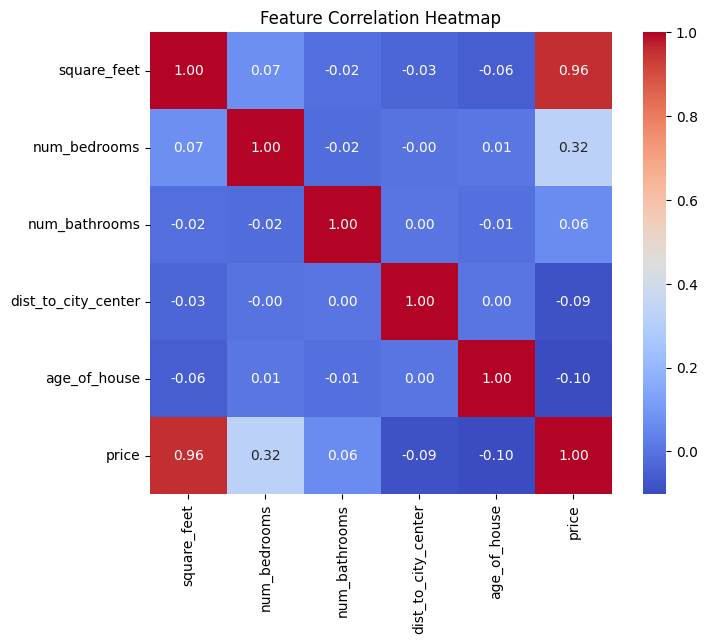

In [13]:
plt.figure(figsize=(7,5))
correlation_heatmap(df)
plt.show()


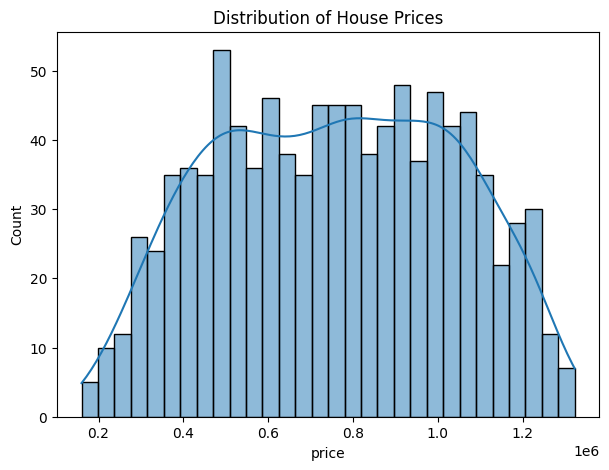

In [14]:
plt.figure(figsize=(7,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [15]:
X, y = split_features_target(df)

model = RealEstateModel()
metrics = model.train(X, y)

metrics


{'train_rmse': np.float64(24901.33588915901),
 'train_r2': 0.9919766080676963,
 'test_rmse': np.float64(24042.576171365985),
 'test_r2': 0.9925747160905004}

In [16]:
model.get_coefficients(X.columns)


,feature,coefficient
0,square_feet,300.750384
1,num_bedrooms,49808.619110
2,num_bathrooms,29084.763258
3,dist_to_city_center,-1862.796493
4,age_of_house,-948.184639
5,intercept,-3197.080846


<Figure size 700x500 with 0 Axes>

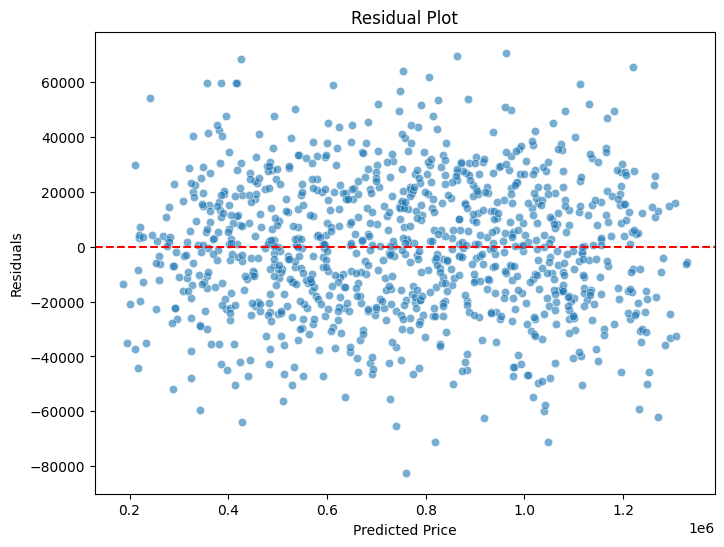

In [17]:
y_pred = model.predict(X)

plt.figure(figsize=(7,5))
residual_plot(y, y_pred)
plt.show()


In [18]:
new_house = pd.DataFrame({
    "square_feet": [1800],
    "num_bedrooms": [3],
    "num_bathrooms": [2],
    "dist_to_city_center": [8],
    "age_of_house": [12],
})

pred_price = model.predict(new_house)[0]
print(f"Estimated Price: ₹{pred_price:,.0f}")


Estimated Price: ₹719,468
